In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
df = pd.read_csv("Reviews.csv")
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [2]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


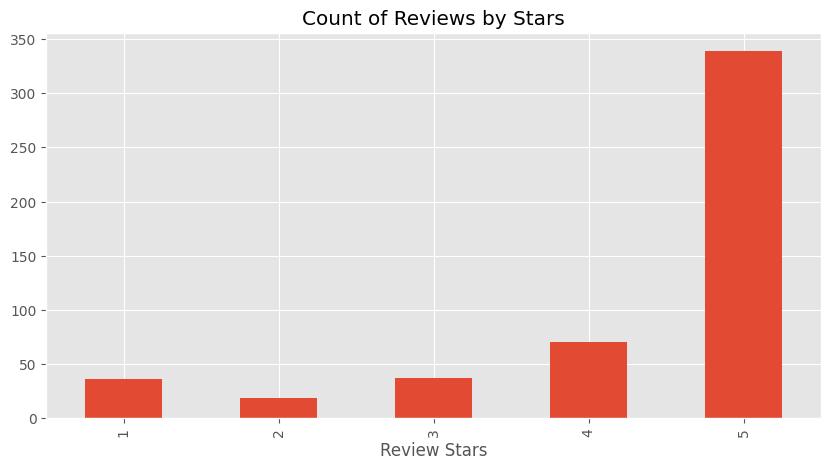

In [3]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [4]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [5]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
import nltk

# Download the averaged_perceptron_tagger and punkt models
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

tagged = nltk.pos_tag(tokens)

print(tagged[:10])


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('sentence', 'NN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SHYAMSUNDAR CK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\SHYAMSUNDAR
[nltk_data]     CK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker/english_ace_multiclass.pickle[0m

  Searched in:
    - 'C:\\Users\\SHYAMSUNDAR CK/nltk_data'
    - 'C:\\Users\\SHYAMSUNDAR CK\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\SHYAMSUNDAR CK\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\SHYAMSUNDAR CK\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\SHYAMSUNDAR CK\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [12]:
import nltk

# Download the maxent_ne_chunker and words models
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize import word_tokenize

tagged = nltk.pos_tag(tokens)

# Perform named entity recognition
entities = nltk.chunk.ne_chunk(tagged)

# Print the named entities
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\SHYAMSUNDAR CK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to C:\Users\SHYAMSUNDAR
[nltk_data]     CK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


(S This/DT is/VBZ a/DT sample/JJ sentence/NN ./.)


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
sia.polarity_scores(example)


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [17]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [19]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


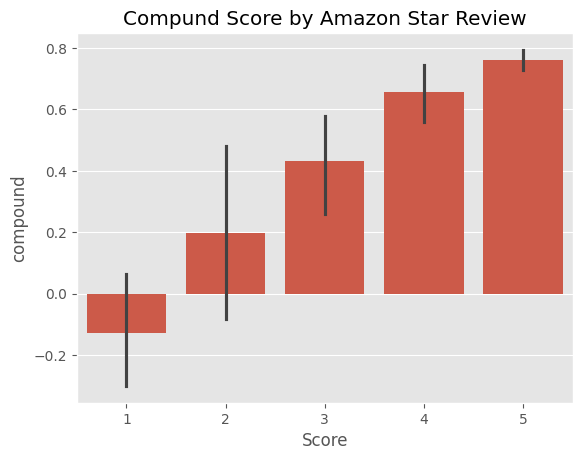

In [20]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

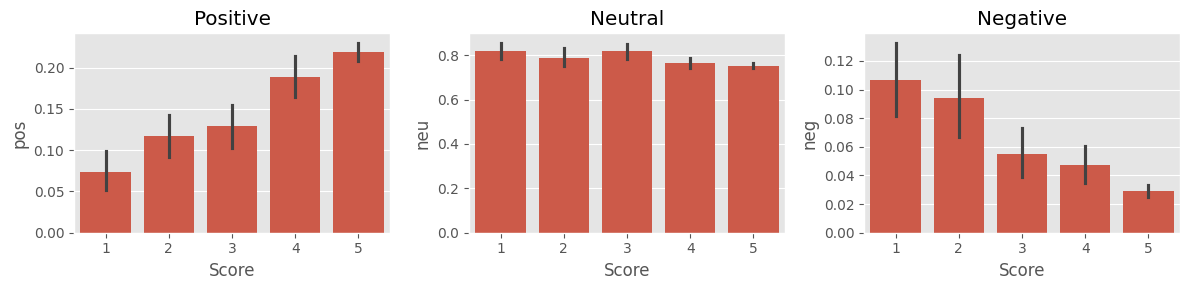

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

ModuleNotFoundError: No module named 'transformers'

In [23]:
!pip install transformers


     ---------------------------------------- 0.0/43.7 kB ? eta -:--:--
     ---------------------------------------- 43.7/43.7 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.4 MB 24.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.2/9.4 MB 23.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.4 MB 25.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.7/9.4 MB 25.3 MB/s eta 0:00:01
   ------------------------ --------------- 5.7/9.4 MB 24.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.2/9.4 MB 21.9 MB/s eta 0:00:01
   ---------------------------- ----------- 6.6/9.4 MB 19.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.0/9.4 MB 18.8 MB/s eta 0:00:01
   -------------------------------- ------- 7.6/9.4 MB 18.0 MB/s eta 0:00:01
   ---------------------------------- ----- 8.2/9.4 MB 17.4 MB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [25]:
!pip install torch
!pip install tensorflow

   ---------------------------------------- 0.0/197.8 MB ? eta -:--:--
   ---------------------------------------- 0.7/197.8 MB 15.5 MB/s eta 0:00:13
   ---------------------------------------- 2.2/197.8 MB 28.0 MB/s eta 0:00:07
    --------------------------------------- 3.7/197.8 MB 29.2 MB/s eta 0:00:07
    --------------------------------------- 4.4/197.8 MB 25.4 MB/s eta 0:00:08
   - -------------------------------------- 5.3/197.8 MB 24.2 MB/s eta 0:00:08
   - -------------------------------------- 5.7/197.8 MB 22.9 MB/s eta 0:00:09
   - -------------------------------------- 6.6/197.8 MB 20.9 MB/s eta 0:00:10
   - -------------------------------------- 7.1/197.8 MB 19.6 MB/s eta 0:00:10
   - -------------------------------------- 7.4/197.8 MB 18.2 MB/s eta 0:00:11
   - -------------------------------------- 7.7/197.8 MB 17.0 MB/s eta 0:00:12
   - -------------------------------------- 8.0/197.8 MB 16.1 MB/s eta 0:00:12
   - -------------------------------------- 8.3/197.8 MB 15.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.1 requires torch==2.3.1, but you have torch 2.4.0 which is incompatible.
torchvision 0.18.1 requires torch==2.3.1, but you have torch 2.4.0 which is incompatible.

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.6/385.2 MB 17.5 MB/s eta 0:00:22
   ---------------------------------------- 1.6/385.2 MB 20.6 MB/s eta 0:00:19
   ---------------------------------------- 3.0/385.2 MB 23.8 MB/s eta 0:00:17
   ---------------------------------------- 3.5/385.2 MB 24.4 MB/s eta 0:00:16
   ---------------------------------------- 3.5/385.2 MB 24.4 MB/s eta 0:00:16
   ---------------------------------------- 3.5/385.2 MB 24.4 MB/s eta 0:00:16
   ---------------------------------------- 3.5/385.2 MB 24.4 MB/s eta 0:00:16
   ---------------------------------------- 3.5/385.2 MB 24.4 MB/s eta 0:00:16
   ---------------------------------------- 3.5/385.2 MB 8.6 MB/s eta 0:00:45
   ---------------------------------------- 3.9/385.2 MB 8.5 MB/s eta 0:00


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax